In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("WEATHER.csv")

data_visualize

,Solar (W/m2),AirTemp (DegC),RH (%),(delta)PD
0,0,21.9,97,-0.1
1,113,22.3,100,-0.1
2,152,22.8,100,-0.1
3,141,23.3,100,-0.1
4,123,23.6,99,-0.1
...,...,...,...,...
407,0,14.5,93,-0.1
408,0,13.9,99,-0.1
409,0,14.4,100,-0.1
410,0,14.6,98,-0.1


In [3]:
data = np.loadtxt("WEATHER_np.csv", delimiter = ',', dtype = np.float32)

X_COL = len(data_visualize.columns) - 1

x = data[:, :X_COL]
y = data[:, [-1]].ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [4]:
#### LINEAR MODEL ####

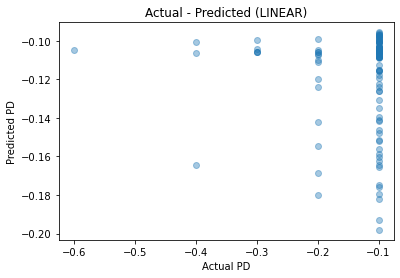

In [12]:
SupportVectorRegModel_linear = SVR(kernel = 'linear', C = 1, gamma = 'auto', epsilon = .001)
SupportVectorRegModel_linear.fit(x_train, y_train)

y_hat_linear = SupportVectorRegModel_linear.predict(x_test)

plt.scatter(y_test, y_hat_linear, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Actual - Predicted (LINEAR)')
plt.show()

In [13]:
mse = mean_squared_error(y_test, y_hat_linear)
rmse = np.sqrt(mse)
mean_absolute_error(y_test, y_hat_linear)

print("LINEAR RMSE:", rmse)
print("LINEAR MAE:", mean_absolute_error(y_test, y_hat_linear))

LINEAR RMSE: 0.09055831335540938
LINEAR MAE: 0.048805576337902494


In [7]:
#### RBF MODEL ####

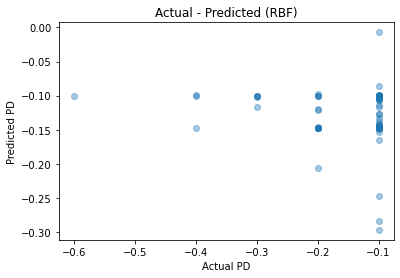

In [8]:
SupportVectorRegModel_rbf = SVR(kernel = 'rbf', C = 100, gamma = 'auto', epsilon = .001)
SupportVectorRegModel_rbf.fit(x_train, y_train)

y_hat_rbf = SupportVectorRegModel_rbf.predict(x_test)

plt.scatter(y_test, y_hat_rbf, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Actual - Predicted (RBF)')
plt.show()

In [9]:
mse = mean_squared_error(y_test, y_hat_rbf)
rmse = np.sqrt(mse)
mean_absolute_error(y_test, y_hat_rbf)

print("RBF RMSE:", rmse)
print("RBF MAE:", mean_absolute_error(y_test, y_hat_rbf))

RBF RMSE: 0.0968761417137628
RBF MAE: 0.06078976219334993
